# Tutorial for Creating a Model
[PyBaMM/examples/notebooks/Creating Models at develop · pybamm-team/PyBaMM](https://github.com/pybamm-team/PyBaMM/tree/develop/examples/notebooks/Creating%20Models)

## ODE Model

In [2]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt


In [3]:
model = pybamm.BaseModel()

In [4]:
x = pybamm.Variable("x")
y = pybamm.Variable("y")

In [5]:
dxdt = 4*x-2*y
dydt = 3*x-1*y

In [6]:
model.rhs = {x: dxdt, y: dydt}

In [7]:
model.initial_conditions={x: pybamm.Scalar(1),y: pybamm.Scalar(2)}

In [8]:
model.variables = {"x": x, "y": y, "z": x + 4 * y}

In [9]:
disc = pybamm.Discretisation()  # use the default discretisation
disc.process_model(model);

In [10]:
solver = pybamm.ScipySolver()
t = np.linspace(0, 1, 20)
solution = solver.solve(model, t)

In [11]:
t_sol, y_sol = solution.t, solution.y  # get solution times and states
x = solution["x"]  # extract and process x from the solution
y = solution["y"]  # extract and process y from the solution

In [15]:
len(y_sol[1,:])

20

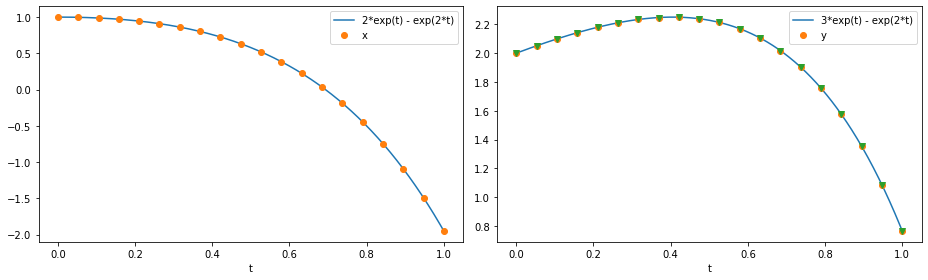

In [16]:
t_fine = np.linspace(0, t[-1], 1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
ax1.plot(t_fine, 2 * np.exp(t_fine) - np.exp(2 * t_fine), t_sol, x(t_sol), "o")
ax1.set_xlabel("t")
ax1.legend(["2*exp(t) - exp(2*t)", "x"], loc="best")

ax2.plot(t_fine, 3 * np.exp(t_fine) - np.exp(2 * t_fine), t_sol, y(t_sol), "o")
ax2.set_xlabel("t")
ax2.legend(["3*exp(t) - exp(2*t)", "y"], loc="best")

plt.tight_layout()
plt.show()

## PDE Model

In [ ]:
model = pybamm.BaseModel()

c = pybamm.Variable("Concentration", domain="negative particle")

In [ ]:
N = -pybamm.grad(c)  # define the flux
dcdt = -pybamm.div(N)  # define the rhs equation

model.rhs = {c: dcdt}  # add the equation to rhs dictionary

In [ ]:
# initial conditions
model.initial_conditions = {c: pybamm.Scalar(1)}

# boundary conditions
lbc = pybamm.Scalar(0)
rbc = pybamm.Scalar(2)
model.boundary_conditions = {c: {"left": (lbc, "Neumann"), "right": (rbc, "Neumann")}}